In [9]:
from pylab import *
%matplotlib inline
import random

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

Integrador

In [10]:
def rk4_a(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

Ecuaciones de movimiento sin fricción o gravedad

In [11]:
def e_mov(r_v,t,fric=0,g=0,m=1):
    u = sqrt(r_v[2]**2 + r_v[3]**2)
    dx = r_v[2] 
    dy = r_v[3]
    
    if fric==0:
        dvx,dvy = 0, -(g/m)
        
    else:
        dvx = -  fric([r_v[2],r_v[3]])[0] #nuestro modelo de fricción sólo depende de la velocidad 
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]

    
    return array([dx,dy,dvx,dvy])


Fricción lineal y cuadrática por si a caso

In [12]:
def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y= gamma*norm_v*v[1]
    return array([f_x,f_y])

# Protones en un rectángulo con canales

Da la trayectoria de los protones en una caja rectangular. Cuando tocan un canal se salen y se quedan fuera estáticos.

$x=1$

In [13]:
def tiro1(p,N,fric,canal,rad_canal):

    trayectoria = zeros((N,len(p)))
    mi_dt = .1
    trayectoria[0,:] = array(p)
    n = 0
    for i in range(N-1):
        t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric)
        
        ## pared inferior ##
        
        if sol_dt[-1,1] < 0:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[1]) > 1e-1:
                if (y_izq[1])*(y_med[1]) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
            trayectoria[i+1,:] = y_izq    
       
        ## pared superior ##
        
        elif sol_dt[-1,1] > 5:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[1]-5) > 1e-1:
                if (y_izq[1]-5)*(y_med[1]-5) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
            trayectoria[i+1,:] = y_izq    

        ## pared izquierda ##
        
        elif sol_dt[-1,0] < 0:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[0]) > 1e-1:
                if (y_izq[0])*(y_med[0]) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])
            trayectoria[i+1,:] = y_izq    
       
        ## pared derecha ##
        
        elif sol_dt[-1,0] > 3:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[0]-3) > 1e-1:
                if (y_izq[0]-3)*(y_med[0]-3) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])
            trayectoria[i+1,:] = y_izq
        
        
        
        
        
        ## aquí sale el protón cuando entra en el campo del canal ##
        
        
        else:
        
            for j in range(len(canal)):

                if ((sol_dt[-1,0] - canal[j][0])**2 + (sol_dt[-1,1] - canal[j][1])**2) < (rad_canal)**2:

                    ## hace que el protón se quede en un punto fijo fuera ##

                    for k in range(N-i-1):
                        trayectoria[k+i+1,:] = [canal[j][0]-1,canal[j][1],0,0]
                    n = n+1
                    return trayectoria,n,i
                    quit()

                else:
                    trayectoria[i+1,:] = sol_dt[-1,:]


    return trayectoria,n,i

In [14]:
def celula1(protones,tiempo,canales_Izq,rad_canal,vel_media,pared,techo):
    
    x = linspace(-4,8,1)
    m = zeros(tiempo)
    m[0] = protones
    nn = zeros(tiempo)

    for l in range(protones):
        #p_ini = [1,2,-1,0]
        p_ini = [pared*rand(),techo*rand(),2*vel_media*(rand()-0.5),2*vel_media*(rand()-0.5)]
        trayectoria,n,i = tiro1(p_ini,tiempo,0,canales_Izq,rad_canal)
        nn[i] = nn[i] + n

        #plot(trayectoria[:,0],trayectoria[:,1],'--')
        plot(trayectoria[-1,0],trayectoria[-1,1],marker = 'o', color = 'blue', markersize = 3.5, markeredgewidth = 0.1)

    ## cuenta los protones dentro de la célula ##    

    for i2 in range(tiempo - 1):
        m[i2 + 1] = m[i2] - nn[i2]    

    plt.plot((0, 0), (0, techo), 'green')
    plt.plot((0, pared), (techo, techo), 'green')
    plt.plot((pared,pared),  (techo, 0), 'green')
    plt.plot((0,pared),  (0, 0), 'green')

    for j in range(len(canales_Izq)):
    
        y = linspace(-rad_canal,rad_canal,100)
        plot(sqrt(rad_canal**2 - y**2),y+canales_Izq[j][1],'red')
        plot(sqrt(rad_canal**2 - y**2),y+canales_Izq[j][1],'red')

    plt.ylim(-1,6)
    plt.xlim(-1,4)

    plt.axes().set_aspect('equal', 'datalim')
    grid(True)
    show()

    ejex = arange(tiempo)
    plot(ejex,m)

    #print trayectoria
    #print nn
    #print m

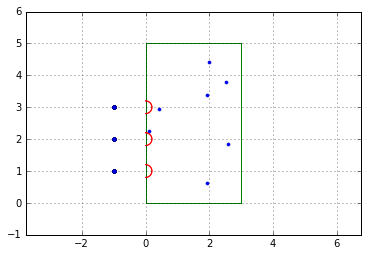

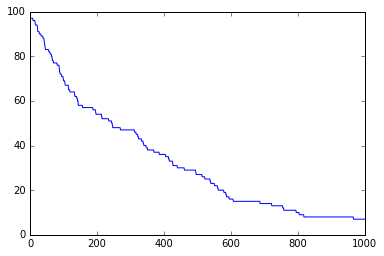

In [182]:
celula1(100,1000,[[0,1],[0,2],[0,3]],0.2,1,3,5)

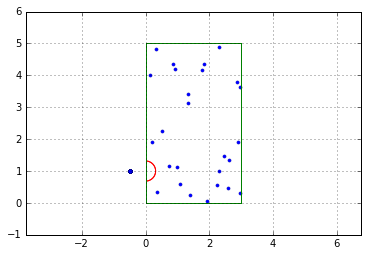

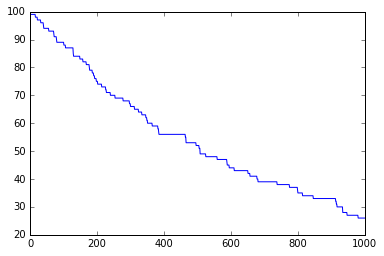

In [46]:
celula1(100,1000,[[0,1]],1,3,5)

# Bases y Protones

Programa inicial de las bases comiéndose a los protones y protones apareciendo aleatoriamente.

In [15]:
def tiro2(p,N,fric,pared,techo):

    trayectoria = zeros((N,len(p)))
    mi_dt = .1
    trayectoria[0,:] = array(p)
    n = 0
    for i in range(N-1):
        
        
        ## Plan de la estructura ##
        
        ## if chocan entonces pos[i] = (0,-1,0,0)
        ## if pos[i] = (0,-1,0,0) and rand() > 0.9 
        
        
        t,sol_dt = rk4_a(e_mov,trayectoria[i,:],[0,mi_dt],fric)
        
        ## pared inferior ##
        
        if sol_dt[-1,1] < 0:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[1]) > 1e-1:
                if (y_izq[1])*(y_med[1]) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
            trayectoria[i+1,:] = y_izq    
       
        ## pared superior ##
        
        elif sol_dt[-1,1] > techo:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[1]-techo) > 1e-1:
                if (y_izq[1]-techo)*(y_med[1]-techo) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
            trayectoria[i+1,:] = y_izq    

        ## pared izquierda ##
        
        elif sol_dt[-1,0] < 0 and sol_dt[-1,0] > -0.4:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[0]) > 1e-1:
                if (y_izq[0])*(y_med[0]) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])
            trayectoria[i+1,:] = y_izq    
       
        ## pared derecha ##
        
        elif sol_dt[-1,0] > pared:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]
            while abs(y_izq[0]-pared) > 1e-1:
                if (y_izq[0]-pared)*(y_med[0]-pared) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(e_mov,reinicio,[0,dt_busqueda],fric)
                y_izq = reinicio
                y_med = sol[-1,:]
            y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])
            trayectoria[i+1,:] = y_izq
        
        
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]

    return trayectoria[-1,:]

In [16]:
def prueba1(NumP,NumB,tiempo, Ptotales, Btotales, Interaccion, pared,techo,vel_media,Prob,canal,rad_canal):
    
    p_ini_P = zeros((Ptotales,4))
    p_ini_B = zeros((Btotales,4))
    trayectoria_P = zeros((Ptotales,tiempo,4))
    trayectoria_B = zeros((Btotales,tiempo,4))
    n = zeros(tiempo)
    
    ## Pone a todos afuera ##
    
    for l in range(Ptotales):
        p_ini_P[l,:] = [-0.5,0.4,0,0]
        
    for l in range(Btotales):
        p_ini_B[l,:] = [-0.5,0.2,0,0]
    
    ## Pone la condición inicial a los que sí están adentro##
    
    for l in range(NumP):
        p_ini_P[l,:] = [pared*rand(),techo*rand(),2*vel_media*(rand()-0.5),2*vel_media*(rand()-0.5)]

    for l in range(NumB):
        p_ini_B[l,:] = [pared*rand(),techo*rand(),2*vel_media*(rand()-0.5),2*vel_media*(rand()-0.5)]
        
    
    for i in range(Ptotales):
        for k in range(4):
            trayectoria_P[i,0,k] = p_ini_P[i,k]
        
    for i in range(Btotales):
        for k in range(4):
            trayectoria_B[i,0,k] = p_ini_B[i,k]
    
    
    ## Da los pasos de tiempo ##
    
    for i in range(tiempo-1):
        
        
        ## añade partículas aleatoriamente ##
        
        nn = 0
        
        for j in range(Ptotales):
            ## para que sólo haga esto con 10 partículas y no con todas... si son menos? ##
            
            if trayectoria_P[j,i,0] == -0.5 and rand()<Prob and nn<1:
                
                nnn = 0
                
                ## posición en la que aparecen ##
                x = (pared - 4*Interaccion)*rand() + 2*Interaccion
                y = (techo - 4*Interaccion)*rand() + 2*Interaccion
                
                ## velocidad a la que salen lanzados ##
                velx = 2*vel_media*(rand()-0.5) 
                vely = 2*vel_media*(rand()-0.5)
                
                
                ## añade protón ##
                trayectoria_P[j,i,:] = [x,y,velx,vely]
                
                
                ## añade base ##
                for k in range(Btotales):
                    if trayectoria_B[k,i,0] == -0.5 and nnn<1:
                        trayectoria_B[k,i,:] = [x,y,-velx,-vely]
                        nnn = nnn + 1
                ## cuenta ##
                nn = nn + 1
                n[i] = n[i] - 1
        
        
        ## integrador numérico ##
        
        for j in range(Ptotales):
            if trayectoria_P[j,i,0] != -0.5:
                trayectoria_P[j,i+1,:] = tiro2(trayectoria_P[j][i],2,0,pared,techo)
            else:
                trayectoria_P[j,i+1,:] = [-0.5,0.4,0,0]
        
        for j in range(Btotales):
            if trayectoria_B[j,i,0] != -0.5:
                trayectoria_B[j,i+1,:] = tiro2(trayectoria_B[j][i],2,0,pared,techo)
            else:
                trayectoria_B[j,i+1,:] = [-0.5,0.2,0,0]

        
        
        ## Quita las partículas si chocan ##
        
        for j in range(Ptotales):
            for k in range(Btotales):
                if ((trayectoria_P[j,i+1,0] - trayectoria_B[k,i+1,0])**2 + 
                    (trayectoria_P[j,i+1,1] - trayectoria_B[k,i+1,1])**2 < Interaccion 
                    and trayectoria_P[j,i+1,0] != -0.5):
                    trayectoria_P[j,i+1,:] = [-0.5,0.4,0,0]
                    trayectoria_B[k,i+1,:] = [-0.5,0.2,0,0]
                    n[i] = n[i] + 1
        
        
        ## aquí sale el protón cuando entra en el campo del canal ##
        for j in range(Ptotales):
            for c in range(len(canal)):

                if ((trayectoria_P[j,i+1,0] - canal[c][0])**2 + (trayectoria_P[j,i+1,1] - canal[c][1])**2) < (rad_canal)**2:

                    ## hace que el protón se quede en un punto fijo fuera ##
                    trayectoria_P[j,i+1,:] = [-0.5,0.4,0,0]
                    n[i] = n[i] + 1
        
    
    ## Grafica ##
    
    #for k in range(tiempo):
#    for i in range(Ptotales):
#        plot(trayectoria_P[i,k,0],trayectoria_P[i,k,1],marker='o', color = 'red', markersize = 3.5)
#        plot(trayectoria_P[i,:,0],trayectoria_P[i,:,1], '--')

#    for i in range(Btotales):
#        plot(trayectoria_B[i,k,0],trayectoria_B[i,k,1],marker='o', color = 'blue', markersize = 5)
#        plot(trayectoria_B[i,:,0],trayectoria_B[i,:,1], '--')
#
#    plt.plot((0, 0), (0, techo), 'green')
#    plt.plot((0, pared), (techo, techo), 'green')
#    plt.plot((pared,pared),  (techo, 0), 'green')
#    plt.plot((0,pared),  (0, 0), 'green')
#
#    plt.ylim(-1,6)
#    plt.xlim(-1,4)

#    plt.axes().set_aspect('equal', 'datalim')
#    grid(True)
#    show()
    return trayectoria_P,trayectoria_B,n

    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


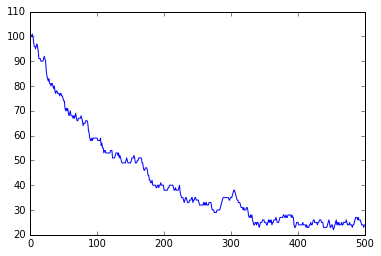

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:63: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:65: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:67: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


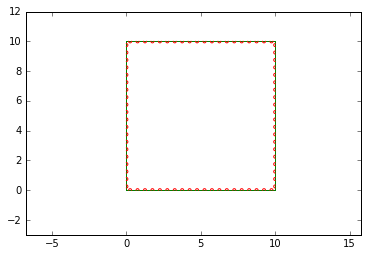

In [33]:
NumP = 100 
NumB = 50
tiempo = 500
Btotales = 200
Ptotales = 200
Interaccion = 0.01
pared = 10
techo = 10
vel = 1
Prob = 0.006
#canal = [[0,1],[0,2],[0,3]]
rad_canal = 0.003


## crea el vector de canales sólo dependiente de la densidad ## 
densidad_c = 2
canales_totales = 2*np.floor(pared*densidad_c) + 2*np.floor(techo*densidad_c)
canal = zeros((canales_totales,2))
for i in arange(0,np.floor(densidad_c*pared)):
    canal[i] = [0,(i+0.5)/densidad_c]
for i in arange(0,np.floor(densidad_c*pared)):
    canal[np.floor(densidad_c*pared) + i] = [pared,(i+0.5)/densidad_c]
for i in arange(0,np.floor(densidad_c*techo)):
    canal[2*np.floor(densidad_c*techo) + i] = [(i+0.5)/densidad_c,0]
for i in arange(0,np.floor(densidad_c*techo)):
    canal[2*np.floor(densidad_c*techo) + np.floor(densidad_c*techo)+ i] = [(i+0.5)/densidad_c,techo]

m = zeros(tiempo)
m[0] = NumP

trayectoria_P, trayectoria_B, n = prueba1(NumP,NumB,tiempo,Btotales,Ptotales,Interaccion,pared,techo,vel,Prob,canal,rad_canal)

## hace el vector que cuenta ##
for i2 in range(tiempo - 1):
    m[i2 + 1] = m[i2] - n[i2] 
    
ejex = arange(tiempo)
plot(ejex,m)
show()

fig, ax = plt.subplots()

particles1, = ax.plot([], [], 'ro')
particles2, = ax.plot([], [], 'bo')

## dibuja la caja ##
ax.plot((0, 0), (0, techo), 'green')
ax.plot((0, pared), (techo, techo), 'green')
ax.plot((pared,pared),  (techo, 0), 'green')
ax.plot((0,pared),  (0, 0), 'green')
ax.axis('equal')
ax.set_xlim(( -3, 12))
ax.set_ylim((-3, 12))


## dibuja los canales ##
    
y = linspace(-rad_canal,rad_canal,100)
    
for j in arange(0,np.floor(densidad_c*pared)):
    ax.plot(sqrt(rad_canal**2 - y**2)+canal[j,0],y+canal[j][1],'red')
for j in arange(np.floor(densidad_c*pared),2*np.floor(densidad_c*pared)):
    ax.plot(-sqrt(rad_canal**2 - y**2)+canal[j,0],y+canal[j][1],'red')
for j in arange(2*np.floor(densidad_c*techo),2*np.floor(densidad_c*pared) + np.floor(densidad_c*techo)):
    ax.plot(y+canal[j][0],sqrt(rad_canal**2 - y**2)+canal[j,1],'red')
for j in arange(2*np.floor(densidad_c*pared) + np.floor(densidad_c*techo), 2*np.floor(densidad_c*pared) + 2*np.floor(densidad_c*techo)):
    ax.plot(y+canal[j][0],-sqrt(rad_canal**2 - y**2)+canal[j,1],'red')

    
    

## hace el video ##    
def init():
    particles1.set_data([], [])
    particles2.set_data([], [])
    return (particles1,particles2)


def animate(i):
    x = trayectoria_P[:,i,0]
    y = trayectoria_P[:,i,1]
    
    z = trayectoria_B[:,i,0]
    w = trayectoria_B[:,i,1]
    
    particles1.set_data(x,y)
    particles2.set_data(z,w)

    return (particles1,particles2)

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=tiempo, interval=100, blit=True)

In [34]:
## imprime el video ##
HTML(anim.to_html5_video())

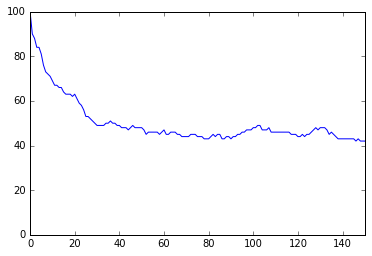

In [83]:
ejex = arange(tiempo)
plot(ejex,m)
xlim(0,150)
ylim(0,100)
show()

In [29]:
def celula2(protones,bases,tiempo,vel_media,pared,techo):
    
    x = linspace(-4,8,1)
    m = zeros(tiempo)
    m[0] = protones
    nn = zeros(tiempo)

    for l in range(protones):
        #p_ini = [1,2,-1,0]
        p_ini = [pared*rand(),techo*rand(),2*vel_media*(rand()-0.5),2*vel_media*(rand()-0.5)]
        trayectoria,n,i = tiro2(p_ini,tiempo,0)
        nn[i] = nn[i] + n

        #plot(trayectoria[:,0],trayectoria[:,1],'--')
        plot(trayectoria[-1,0],trayectoria[-1,1],marker = 'o', color = 'red', markersize = 3.5, markeredgewidth = 0.1)

        
    for l in range(bases):
        #p_ini = [1,2,-1,0]
        p_ini = [pared*rand(),techo*rand(),2*vel_media*(rand()-0.5),2*vel_media*(rand()-0.5)]
        trayectoria,n,i = tiro2(p_ini,tiempo,0)
        nn[i] = nn[i] + n

        #plot(trayectoria[:,0],trayectoria[:,1],'--')
        plot(trayectoria[-1,0],trayectoria[-1,1],marker = 'o', color = 'blue', markersize = 5, markeredgewidth = 0.1)

        
    ## cuenta los protones dentro de la célula ##    

    for i2 in range(tiempo - 1):
        m[i2 + 1] = m[i2] - nn[i2]    

    plt.plot((0, 0), (0, techo), 'green')
    plt.plot((0, pared), (techo, techo), 'green')
    plt.plot((pared,pared),  (techo, 0), 'green')
    plt.plot((0,pared),  (0, 0), 'green')

    plt.ylim(-1,6)
    plt.xlim(-1,4)

    plt.axes().set_aspect('equal', 'datalim')
    grid(True)
    show()

    ejex = arange(tiempo)
    plot(ejex,m)


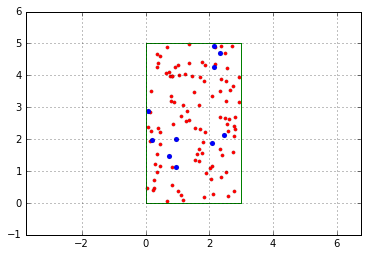

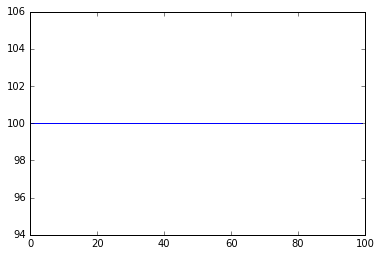

In [69]:
celula2(100,10,100,1,3,5)

In [57]:
rand()

0.43296289523215126

In [68]:
prueba = [[1,2],[3,4],[5,6]]
prueba[0][1]
print len(prueba)

3


In [140]:
a = xrange(5)
print a

xrange(5)


In [148]:
linspace(-0.5,0.5,5)

array([-0.5 , -0.25,  0.  ,  0.25,  0.5 ])

In [177]:
zeros((2,1))

array([[ 0.],
       [ 0.]])

In [ ]:
        #for j in range(len(canal)):
        elif ((sol_dt[-1,0] - canal[1][0])**2 + (sol_dt[-1,1] - canal[1][1])**2) < 0.1:
            
            ## hace que el protón se quede en un punto fijo fuera ##
            
            for k in range(N-i-1):
                trayectoria[k+i+1,:] = [canal[1][0]-0.5,canal[1][1],0,0]
            n = n+1
            return trayectoria,n,i
            quit()

In [85]:
B=zeros((3,2,4))
B[:,0,:] = [[1,2,3,4],[5,6,7,8],[9,1,2,3]]
print B
print B[1][0]

[[[ 1.  2.  3.  4.]
  [ 0.  0.  0.  0.]]

 [[ 5.  6.  7.  8.]
  [ 0.  0.  0.  0.]]

 [[ 9.  1.  2.  3.]
  [ 0.  0.  0.  0.]]]
[ 5.  6.  7.  8.]


In [20]:
a = 3
if a != 5:
    print 3

3


In [78]:
a = array(3)
print a

TypeError: data type not understood

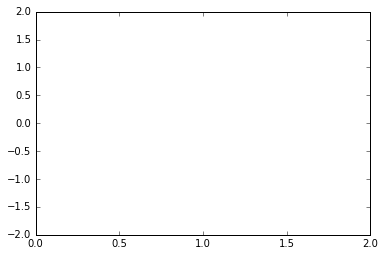

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML



# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)



In [40]:


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)



In [41]:


# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)



In [42]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)


In [43]:
HTML(anim.to_html5_video())

In [48]:
np.linspace(0, 2, 10)

array([ 0.        ,  0.22222222,  0.44444444,  0.66666667,  0.88888889,
        1.11111111,  1.33333333,  1.55555556,  1.77777778,  2.        ])

In [49]:
zeros(3)

array([ 0.,  0.,  0.])

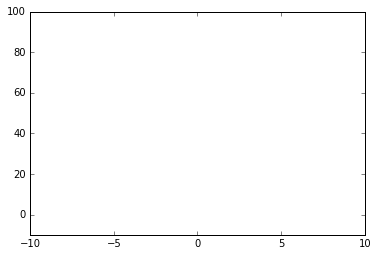

In [75]:
fig, ax = plt.subplots()

ax.set_xlim(( -10, 10))
ax.set_ylim((-10, 100))

line, = ax.plot([], [], 'bo', ms = 6)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(-5, 5, 10)
    y = x + i
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,frames=100, interval=20, blit=True)

In [76]:
HTML(anim.to_html5_video())

In [53]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

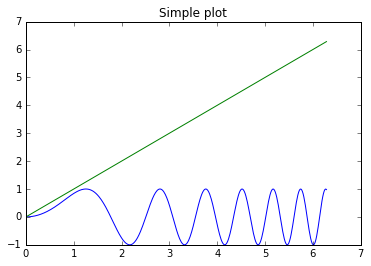

In [68]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x,x)
ax.set_title('Simple plot')

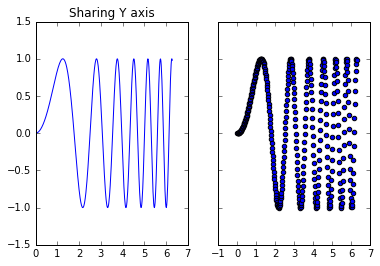

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey='all')
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

In [96]:
rand()

0.17625497036586846

In [94]:
zeros((3,2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [23]:
arange(1,np.floor(3.5))

array([ 1.,  2.])

In [6]:
range(3)

[0, 1, 2]